In [1]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/SubtypeC_D/220127_P36_N1/220127_P36_N1_Z30_mask_JESUS.tif'
mask_path = '/home/tli_project/Desktop/Data/T4/stage1/220127/220127_analysis/220127_P36_N1/211114_P36_N1_FlipV_R277_mask6.tif'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/SubtypeC_D/220127_P36_N1/'
save_name = '220127_P36_N1_Z30_JE'
sig=1

In [2]:
import tifffile as tif
import Neurosetta as neu
import matplotlib.pyplot as plt
import utils.datautils as datautils
import utils.denoise as denoise
import utils.segment as segment
from timeit import default_timer as timer
import numpy as np 
from scipy import ndimage

2022-06-29 13:09:57.681917: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
neuron = tif.imread(data_path)

In [4]:
save_file = save_path+save_name+'_seg2.tif'
tif.imwrite(save_file, neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [18]:
neuron -= neuron.min()
mask = tif.imread(mask_path)
neuron[mask==0] = 0
save_file = save_path+save_name+'_seg2.tif'
tif.imwrite(save_file, neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

FileNotFoundError: [Errno 2] No such file or directory: '/home/tli_project/Desktop/Data/T4/stage1/211114/analysis/211114_P36_N1/211114_P36_N1_FlipV_R277_mask6.tif'

In [4]:
neuron.min(), neuron.max(), neuron.shape

(0, 1, (93, 41, 400, 400))

In [5]:
mask = denoise.mask_4D(neuron, return_mask=False, 
                        xy_pixel=0.076, z_pixel=0.4, 
                        sig=sig, save=True, 
                        save_path=save_path, 
                        save_file=save_name)

masking the image: 100%|██████████| 93/93 [00:10<00:00,  8.61it/s]


In [5]:
seg = segment.segment_4D(neuron, neu_no=1, 
                        max_neu_no=1, min_size=5000,
                        xy_pixel=0.076, z_pixel=0.4,
                        save=True, save_path=save_path, 
                        save_file=save_name)

print(seg.keys())

matching segments: 100%|██████████| 92/92 [00:10<00:00,  9.11it/s]


dict_keys([1])


In [9]:
len(seg[1])

61

In [19]:
neuron.shape

(93, 41, 400, 400)

In [4]:
s = ndimage.generate_binary_structure(len(neuron.shape), len(neuron.shape))
labeled_array, num_labels = ndimage.label(neuron, structure=s)
labels = np.unique(labeled_array)
labels = labels[labels!=0]
test = labeled_array.copy()
test[test!=1] = 0
test2 = neuron.copy()
test2[test==0] = 0
# test = test.astype('uint16')
# save_file = save_path+save_name+'_seg.tif'
# tif.imwrite(save_file, test, imagej=True, resolution=(1./0.076, 1./0.076),
#                 metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})
save_file = save_path+save_name+'_seg2.tif'
tif.imwrite(save_file, test2, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [5]:
N = neu.read_Neuron(data_path)
# neu.Compare_Thresholds(N)

In [6]:
# Get the integer value of the threshold
t = neu.get_threshold(N, method = 'GHT',kappa = 50, omega = 0.7)

# generate an np.array of the image, that has had our threshold applied to it
thresholded_image = neu.apply_threshold(N,t, inplace = False)

In [14]:
tif.imsave(save_path+'mask1', thresholded_image)

In [8]:
N2 = neu.make_Neuron(N.array.copy()) 

In [10]:
N2 = neu.make_Neuron(N.array.copy()) 
t_original = neu.get_threshold(N)
# blur the Original image with a gaussian
N2.Gaussian_filter(sigma = 7.5)
t_blurred = neu.get_threshold(N2)
# Generate the mask
mask = N2.Generate_mask(t_blurred)

In [11]:
N.Mask_image(mask = mask)
# Then apply the threshold fromt he original image to this

N.Mask_image(t = t_original)
N = neu.double_thresholding(N,sigma = 7.5)

# Save the thresholded image as a tif
N.save_tif(save_path+'mask3.tif')


In [18]:
datautils.save_image(save_path+'mask2', mask, xy_pixel=0.0764616, z_pixel=0.4)

ValueError: the ImageJ format does not support data type '?'

In [11]:
mask = tif.imread(mask_path)
neuron[mask==0] = 0
save_file = save_path+save_name+'_seg2.tif'
tif.imwrite(save_file, neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

NameError: name 'mask_path' is not defined

In [30]:
neuron.max()

54113

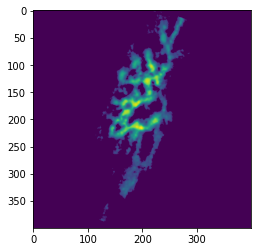

In [31]:
import matplotlib.pyplot as plt
plt.imshow(neuron[35,30])

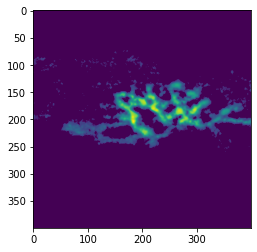

In [ ]:
test = neuron[35,30].copy()
test[test<9000] = 0
plt.imshow(test)

In [ ]:
# plt.imshow(neuron[20,20])

In [ ]:
#make image as binary
# neuron -= neuron.min()
# neuron[neuron != 0] = 1
neuron[35][neuron[35]<10001] = 0
plt.imshow(neuron[35,30])

In [32]:
from timeit import default_timer as timer
import numpy as np 
from scipy import ndimage

s = ndimage.generate_binary_structure(len(neuron.shape), len(neuron.shape))
labeled_array, num_labels = ndimage.label(neuron, structure=s)
labels = np.unique(labeled_array)
labels = labels[labels!=0]

In [33]:
labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int32)

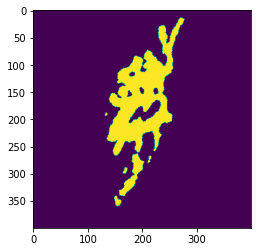

In [34]:
test = labeled_array.copy()
test[test!=1] = 0
plt.imshow(test[36,30])

In [35]:
test.dtype

dtype('int32')

In [36]:
test2 = neuron.copy()
test2[test==0] = 0
test = test.astype('uint16')
save_file = save_path+save_name+'_seg.tif'
tif.imwrite(save_file, test, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})
save_file = save_path+save_name+'_seg2.tif'
tif.imwrite(save_file, test2, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [8]:
seg = segment.segment_4D(neuron, neu_no=1, 
                        max_neu_no=1, min_size=5000,
                        xy_pixel=0.076, z_pixel=0.4,
                        save=True, save_path=save_path, 
                        save_file=save_name)

print(seg.keys())

dict_keys([1])


In [ ]:
print('memory cleared, and kernel stopped')
print('Job is DONE!')
os._exit(00)